In [108]:
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [109]:
salary = pd.read_csv('ceo_data_pay_merged_r3000.csv')
salary = salary.rename(columns={
    'ticker':'Ticker',
    'company_name': 'Company Name',
    'median_worker_pay': 'Median Salary',
    'pay_ratio': 'Ratio',
    'ceo_name' : 'CEO',
    'salary' : 'CEO Salary',
    'industry' : 'Industry'
})


In [110]:
salary.head()


,unamed,Ticker,Company Name,Median Salary,Ratio,CEO,CEO Salary,Industry
0,596,APO,"Apollo Global Management, Inc.",215817,1,Marc Rowan,302310,Financials
1,1616,BOX,"Box, Inc.",196300,1,Aaron Levie,292514,Information Technology
2,60,PINS,"Pinterest, Inc.",284887,1,Benjamin Silbermann,199100,Communication Services
3,92,ABNB,"Airbnb, Inc.",202541,1,Brian Chesky,132152,Consumer Discretionary
4,183,FSR,"Fisker, Inc.",71923,1,Henrik Fisker,68621,Consumer Discretionary


In [273]:
salary[['Median Salary', 'CEO Salary']] = salary[['Median Salary', 'CEO Salary']].astype('float')

salary['CEO Salary (Thousands)'] = salary['CEO Salary'] / 1000

In [274]:
salary.head()


,unamed,Ticker,Company Name,Median Salary,Ratio,CEO,CEO Salary,Industry,CEO Salary (Thousands),Median Salary (Thousands)
0,596,APO,"Apollo Global Management, Inc.",215817.0,1,Marc Rowan,302310.0,Financials,302.310,2158.17
1,1616,BOX,"Box, Inc.",196300.0,1,Aaron Levie,292514.0,Information Technology,292.514,1963.00
2,60,PINS,"Pinterest, Inc.",284887.0,1,Benjamin Silbermann,199100.0,Communication Services,199.100,2848.87
3,92,ABNB,"Airbnb, Inc.",202541.0,1,Brian Chesky,132152.0,Consumer Discretionary,132.152,2025.41
4,183,FSR,"Fisker, Inc.",71923.0,1,Henrik Fisker,68621.0,Consumer Discretionary,68.621,719.23


In [265]:
salary.dtypes

unamed                         int64
Ticker                        object
Company Name                  object
Median Salary                float64
Ratio                          int64
CEO                           object
CEO Salary                   float64
Industry                      object
CEO Salary (Thousands)       float64
Median Salary (Thousands)    float64
dtype: object

In [115]:
print(salary.corr())

                          unamed  Median Salary     Ratio  CEO Salary  \
unamed                  1.000000       0.139266 -0.134666   -0.050149   
Median Salary           0.139266       1.000000 -0.182191    0.100802   
Ratio                  -0.134666      -0.182191  1.000000    0.322431   
CEO Salary             -0.050149       0.100802  0.322431    1.000000   
CEO Salary (Thousands) -0.050149       0.100802  0.322431    1.000000   

                        CEO Salary (Thousands)  
unamed                               -0.050149  
Median Salary                         0.100802  
Ratio                                 0.322431  
CEO Salary                            1.000000  
CEO Salary (Thousands)                1.000000  


C:\Users\victo\AppData\Local\Temp\ipykernel_7264\3745453036.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(salary.corr())


C:\Users\victo\AppData\Local\Temp\ipykernel_7264\3542904263.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(salary.corr(), cmap="YlGnBu", annot = True)


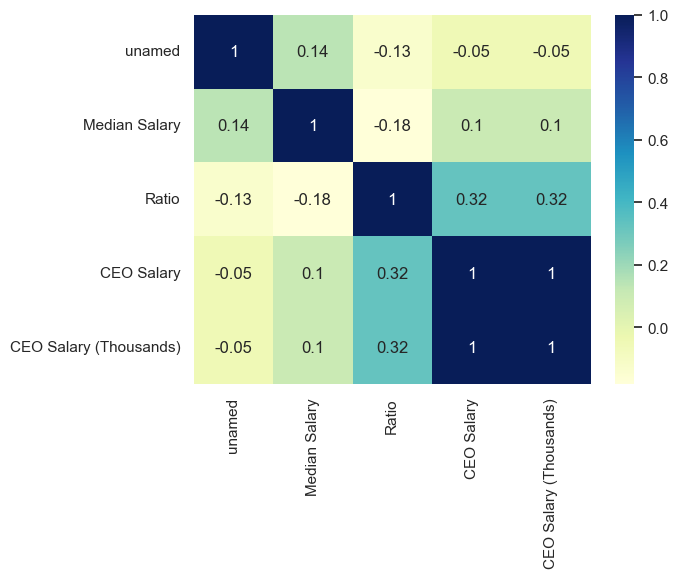

In [116]:
dataplot = sb.heatmap(salary.corr(), cmap="YlGnBu", annot = True)
##quick heatmap does not give any useful information due to it being a small data set with mostly non quantifiable data 


C:\Users\victo\AppData\Local\Temp\ipykernel_7264\365710742.py:21: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sb.stripplot(y='Industry', x='CEO Salary (Thousands)', data=salary, ax=ax3, palette='rocket')


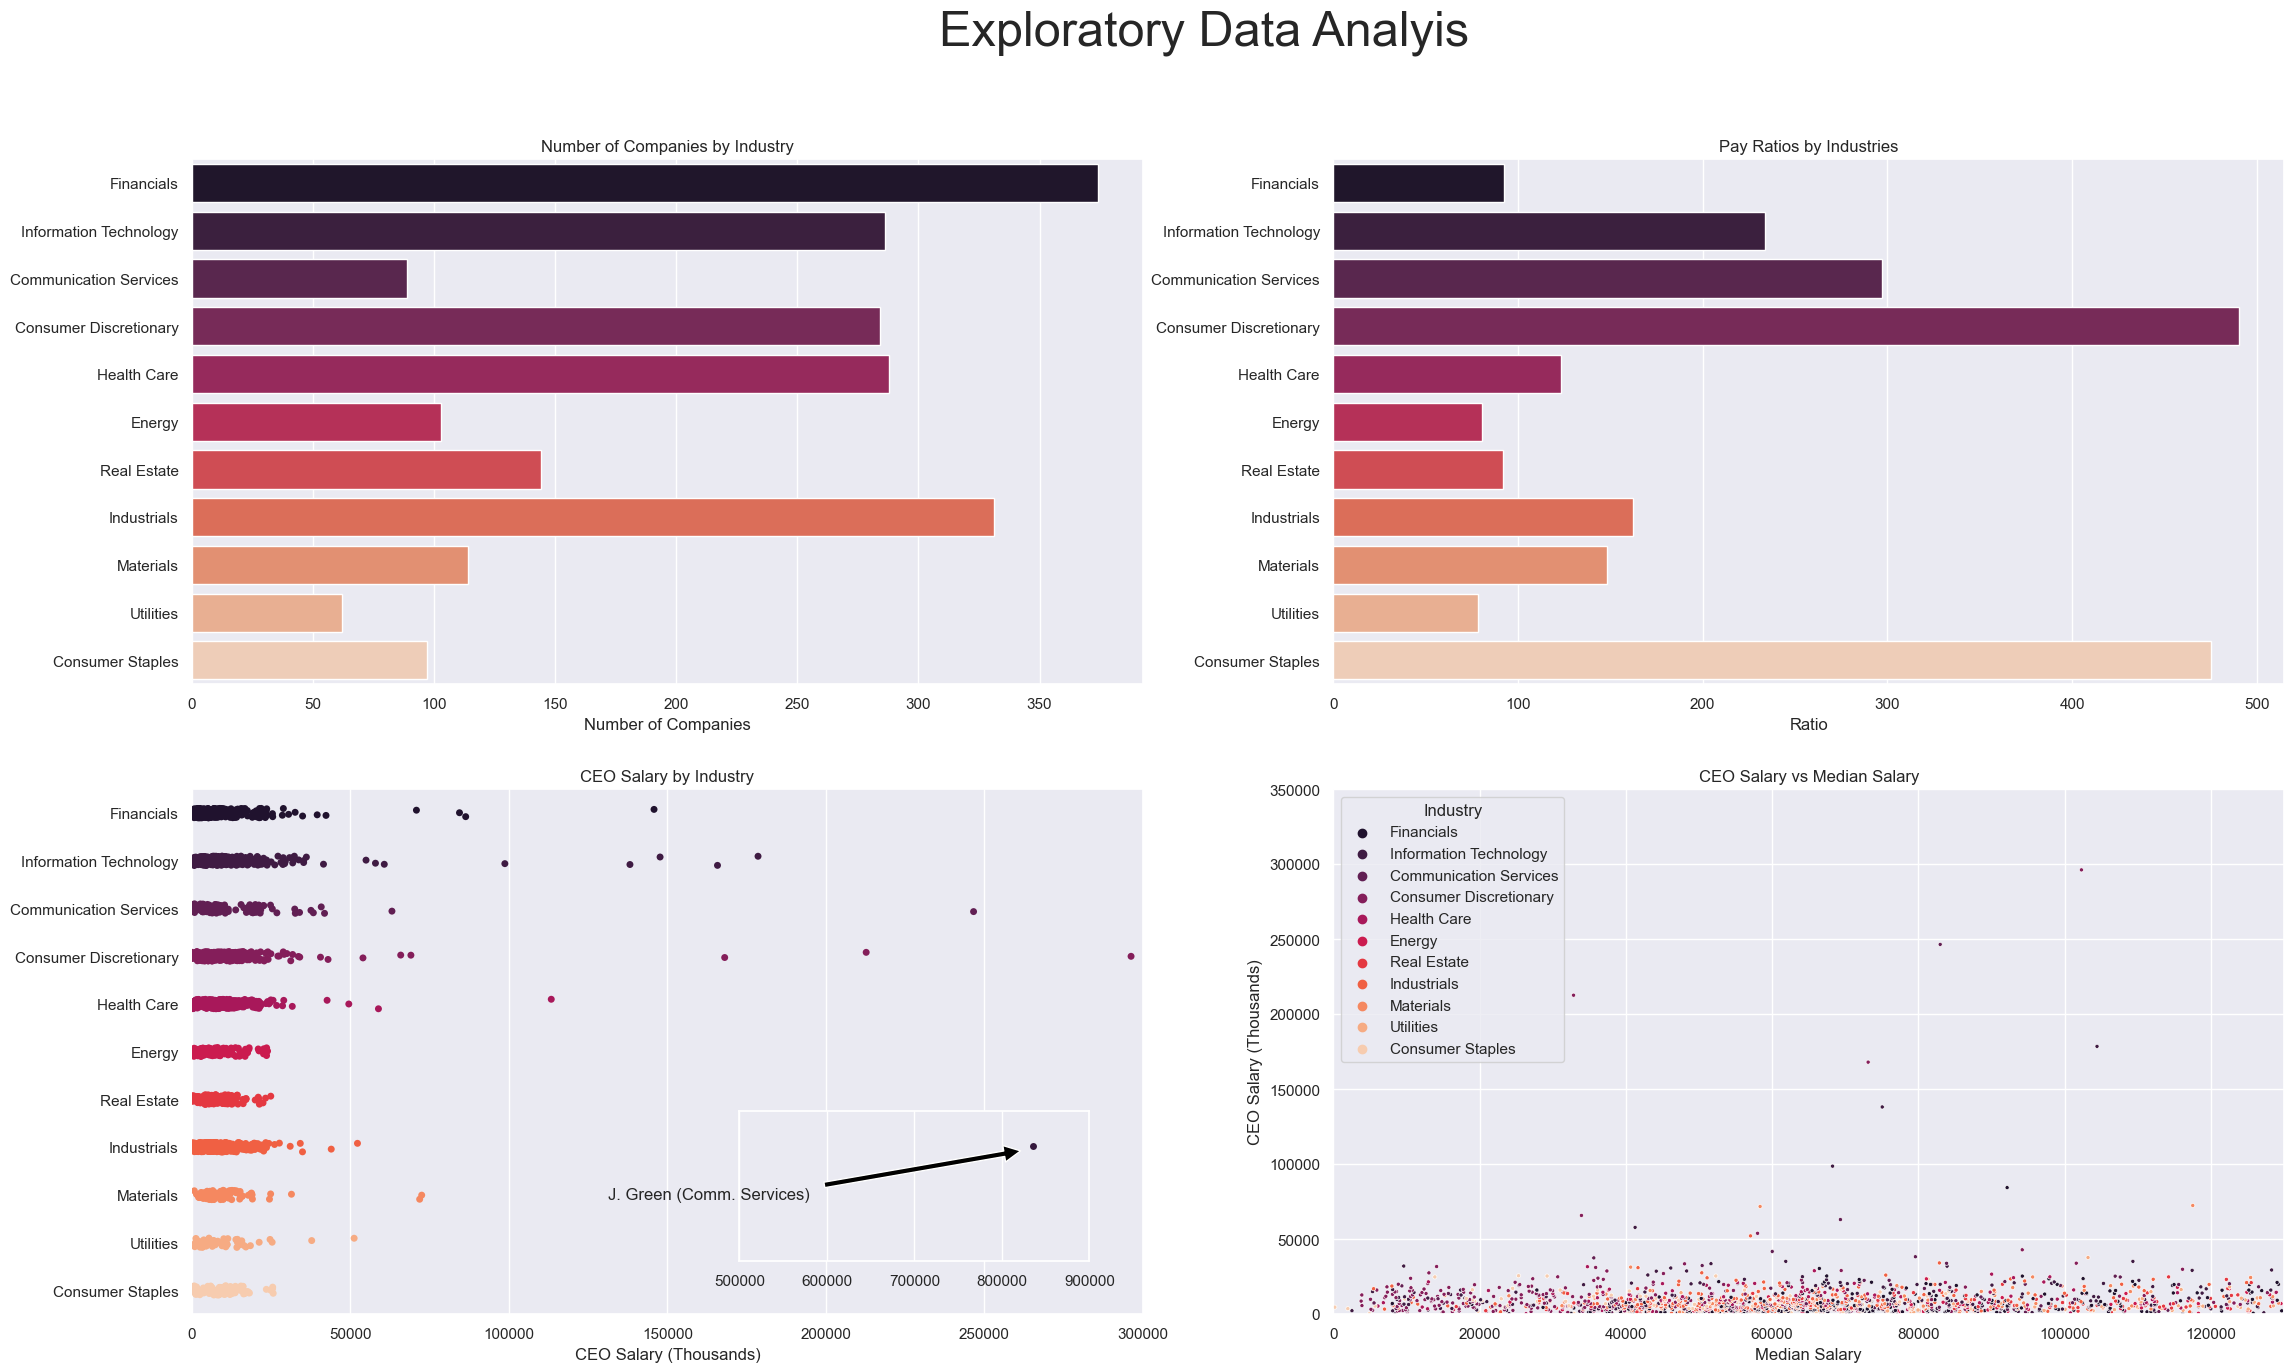

In [281]:
#setting color palette for seaborn graphs

sb.set_palette('rocket')
sb.set_style('darkgrid')
sb.set_context('notebook')

#setting subplots for a whole data figure to display different data inferences

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (27,15))
fig.suptitle('Exploratory Data Analyis', fontsize='35')

sb.countplot(y='Industry', data=salary, ax=ax1, palette='rocket')
ax1.set_xlabel('Number of Companies')
ax1.set_ylabel(None)
ax1.set_title('Number of Companies by Industry')

sb.barplot(y='Industry', x='Ratio', data=salary, ax=ax2, orient="h", errorbar=None, palette='rocket')
ax2.set_ylabel(None)
ax2.set_title('Pay Ratios by Industries')

sb.stripplot(y='Industry', x='CEO Salary (Thousands)', data=salary, ax=ax3, palette='rocket')
ax3.set_title('CEO Salary by Industry')
ax3.set_ylabel(None)
ax3.set_xlim(0,300000)

#adding an inset to my subplot for Jeff Green's salary which overshadows the distribution of the rest of the salaries
axins = inset_axes(ax3, width=3.5, height=1.5, loc=4, borderpad=3.5)
labels=[5000000,6000000,7000000,8000000,9000000]
sb.stripplot(y='Industry', x='CEO Salary (Thousands)', data=salary, ax=axins)
axins.set_xlim(500000,900000)
for axi in [axins]:
    axi.set_xlabel(None)
    axi.set_ylabel(None)
    axi.get_yaxis().set_visible(False)
axi.annotate(
        'J. Green (Comm. Services)', xy=(834000,2.3), xytext=(350000,6),
        arrowprops=dict(facecolor='black', shrink=0.05)
    )

sb.scatterplot(y='CEO Salary (Thousands)', x='Median Salary', hue='Industry', data=salary, ax=ax4, marker='.', palette='rocket')
ax4.ticklabel_format(useOffset=False, style='plain')
ax4.set_xlim(0,130000)
ax4.set_ylim(0,350000)
ax4.set_title('CEO Salary vs Median Salary')


plt.show()

8
